# Classification Assignment 2 

In this Assignment, you will implement two classification machine learning algorithms Logistic Regression & Naive Bayes for the dataset (Liver disease dataset).

1. Import the libraries and Load the dataset and Remove/replace missing values (if any)

2. Split features and labels

3. Split train and test data

4. Implement the Naïve Bayes classifier using Python

        Implement Naïve Bayes Classifier
        Calculate accuracy measures

5. Implement classification using Logistic Regression using Python

        Implement Logistic regression Classifier
        Calculate accuracy measures

In [1]:
# Importing required libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
# Reading input csv
data = pd.read_csv("liver_disease_1.csv")
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


### Exploratory Data Analysis on the dataset 

In [3]:
# Shape of input data
data.shape

(583, 10)

The input data contains 583 rows & 10 columns. Out of 10 columns, "Dataset" column is the target variable - meaning a person has liver disease or not.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Total_Bilirubin             583 non-null    float64
 2   Direct_Bilirubin            583 non-null    float64
 3   Alkaline_Phosphotase        583 non-null    int64  
 4   Alamine_Aminotransferase    583 non-null    int64  
 5   Aspartate_Aminotransferase  583 non-null    int64  
 6   Total_Protiens              583 non-null    float64
 7   Albumin                     583 non-null    float64
 8   Albumin_and_Globulin_Ratio  579 non-null    float64
 9   Dataset                     583 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB


All columns are of integer & float types only except Dataset column (which is target variable & is of object type) - can be converted to 0 (No) & 1 (Yes).

In [5]:
# Renaming column names
data = data.rename({'Alkaline_Phosphotase':'Alk_Phosphotase', 'Alamine_Aminotransferase':'Ala_Aminotransferase','Aspartate_Aminotransferase':'Asp_Aminotransferase','Albumin_and_Globulin_Ratio':'AG_Ratio','Dataset':'Outcome'}, axis=1)
data.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alk_Phosphotase',
       'Ala_Aminotransferase', 'Asp_Aminotransferase', 'Total_Protiens',
       'Albumin', 'AG_Ratio', 'Outcome'],
      dtype='object')

In [6]:
# Details like mean, standard deviation etc for input dataset
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alk_Phosphotase,Ala_Aminotransferase,Asp_Aminotransferase,Total_Protiens,Albumin,AG_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


From the above analysis, below are the highlighted points -

1) Minimum age is 4 and maximum age is 90. <br/>
2) None of the continuous values column like Total_Bilirubin, Direct_Bilirubin etc have 0 minimum value - which is good, we don't need to perform any imputation techniques.<br/>
3) Count is 579 for column 'AG_Ratio', giving an indication of 4 missing values.<br/>

<b>Finding missing values & replacing them</b>

In [7]:
# Check for missing values
data.isnull().sum()

Age                     0
Total_Bilirubin         0
Direct_Bilirubin        0
Alk_Phosphotase         0
Ala_Aminotransferase    0
Asp_Aminotransferase    0
Total_Protiens          0
Albumin                 0
AG_Ratio                4
Outcome                 0
dtype: int64

From the above, only "AG_Ratio" column has 4 missing values, rest all column don't have any missing values.

In [8]:
# Extracting missing value rows - 4 rows are found
data[data.isnull().any(axis=1)]

,Age,Total_Bilirubin,Direct_Bilirubin,Alk_Phosphotase,Ala_Aminotransferase,Asp_Aminotransferase,Total_Protiens,Albumin,AG_Ratio,Outcome
209,45,0.9,0.3,189,23,33,6.6,3.9,NaN,Yes
241,51,0.8,0.2,230,24,46,6.5,3.1,NaN,Yes
253,35,0.6,0.2,180,12,15,5.2,2.7,NaN,No
312,27,1.3,0.6,106,25,54,8.5,4.8,NaN,No


<b>Replacing missing values for column 'AG_Ratio' with mean</b>

In [9]:
# Calculating mean value for AG_Ratio column
ag_ratio_mean = data['AG_Ratio'].mean(skipna=True)
data['AG_Ratio'].replace(np.NaN, ag_ratio_mean, inplace=True)

data.isnull().any()

Age                     False
Total_Bilirubin         False
Direct_Bilirubin        False
Alk_Phosphotase         False
Ala_Aminotransferase    False
Asp_Aminotransferase    False
Total_Protiens          False
Albumin                 False
AG_Ratio                False
Outcome                 False
dtype: bool

Missing values present in 'AG_Ratio' column have been successfully replaced.

<b>Checking for duplicate rows</b>

In [10]:
# Check for duplicates
duplicates = data[data.duplicated()]
print (len(duplicates), 'duplicates found.')
duplicates

13 duplicates found.


,Age,Total_Bilirubin,Direct_Bilirubin,Alk_Phosphotase,Ala_Aminotransferase,Asp_Aminotransferase,Total_Protiens,Albumin,AG_Ratio,Outcome
19,40,0.9,0.3,293,232,245,6.8,3.1,0.80,Yes
26,34,4.1,2.0,289,875,731,5.0,2.7,1.10,Yes
34,38,2.6,1.2,410,59,57,5.6,3.0,0.80,No
55,42,8.9,4.5,272,31,61,5.8,2.0,0.50,Yes
62,58,1.0,0.5,158,37,43,7.2,3.6,1.00,Yes
106,36,5.3,2.3,145,32,92,5.1,2.6,1.00,No
108,36,0.8,0.2,158,29,39,6.0,2.2,0.50,No
138,18,0.8,0.2,282,72,140,5.5,2.5,0.80,Yes
143,30,1.6,0.4,332,84,139,5.6,2.7,0.90,Yes
158,72,0.7,0.1,196,20,35,5.8,2.0,0.50,Yes


<b>Removing duplicate rows</b>

In [11]:
# Removing duplicate rows
data = data.drop_duplicates()

duplicates = data[data.duplicated()]
print (len(duplicates), 'duplicates found.')

0 duplicates found.


In [12]:
data.shape

(570, 10)

After removing duplicate rows (i.e. 13), number of rows are 570.

<b>Analysing the target variable - Outcome</b>

In [13]:
# Analysing the target variable - Outcome
person_wo_liver_dis = len(data[data['Outcome']=='No'])
person_with_liver_dis = len(data[data['Outcome']=='Yes'])

print('People diagonsed with liver disease     -', person_with_liver_dis)
print('People not diagonsed with liver disease -', person_wo_liver_dis)

People diagonsed with liver disease     - 406
People not diagonsed with liver disease - 164


<AxesSubplot:>

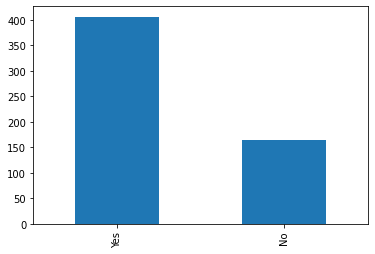

In [14]:
# Plotting bar plot for target variable 'Outcome'
data['Outcome'].value_counts().plot(kind="bar")

The above graph shows that the data is biased towards 'Outcome' value as Yes. The number of persons diagnosed with liver disease are almost thrice the number of persons not diagnosed with liver disease.

<b>Converting 'Outcome' target column value to 0 & 1<b>

In [15]:
# Converting Yes/No to 1/0
data['Outcome'] = data['Outcome'].astype('category').cat.codes
data['Outcome'].value_counts()

1    406
0    164
Name: Outcome, dtype: int64

<b>Plotting various graphs-</b>

1. Heatmap -

<AxesSubplot:>

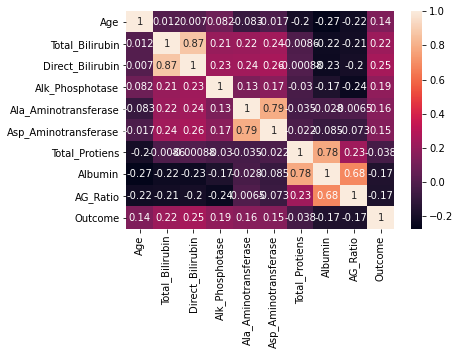

In [16]:
# Finding correlation values for all columns in input dataset
corr = data.corr()

# Plot correlation matrix for all columns
sns.heatmap(corr, annot=True)

From the above heatmap, we can deduce following observations -<br/>
1. Total_Bilirubin & Direct_Bilirubin are strongly correlated. We can drop either of the column.
2. Albumin & Total_Protiens are strongly correlated. We can drop either of the column.
3. Albumin & AG_Ratio are moderately correlated.
4. Ala_Aminotransferase & Asp_Aminotransferase are strongly correlated.
5. No independent column is strongly related to target variable, columns like Total_bilirubin, Direct_bilirubin, Alk_Phosphotase & Ala_Aminotransferase show very less correlation.

In [17]:
# Extracting target variable 'Outcome' & independent columns in a separate variable
target_data = data.iloc[:,-1] 
input_data = data.iloc[:,0:len(data.columns)-1]

# Output columns of independent variables
input_data.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alk_Phosphotase',
       'Ala_Aminotransferase', 'Asp_Aminotransferase', 'Total_Protiens',
       'Albumin', 'AG_Ratio'],
      dtype='object')

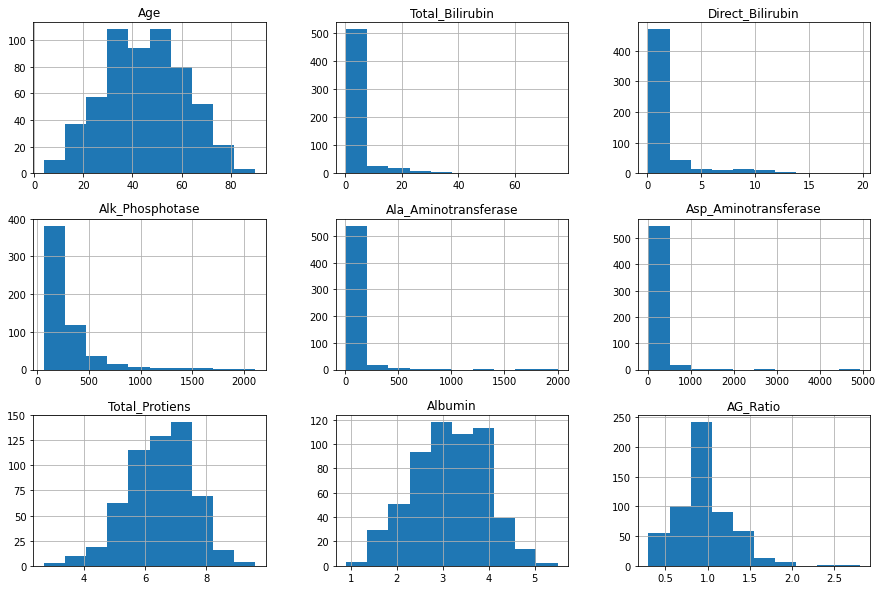

In [18]:
# Plotting histogram for all independent variables
input_data.hist(figsize = (15, 10))
plt.show()

Box plot for Age column


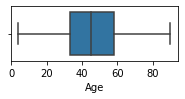

Box plot for Total_Bilirubin column


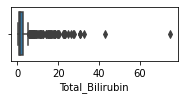

Box plot for Direct_Bilirubin column


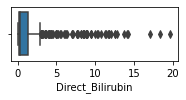

Box plot for Alk_Phosphotase column


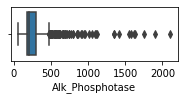

Box plot for Ala_Aminotransferase column


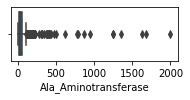

Box plot for Asp_Aminotransferase column


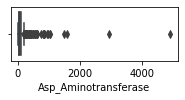

Box plot for Total_Protiens column


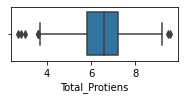

Box plot for Albumin column


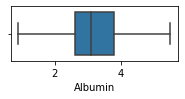

Box plot for AG_Ratio column


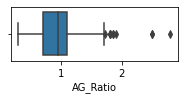

In [19]:
# Plotting box plots for all independent variables
for col in input_data.columns:
    print('Box plot for',col, 'column')
    plt.figure(figsize = (3, 1))
    sns.boxplot(x=col, data = input_data)
    plt.show()

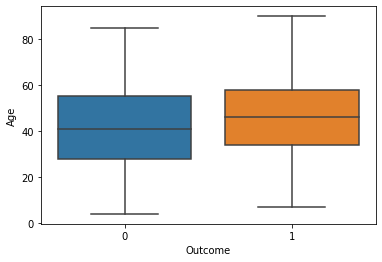

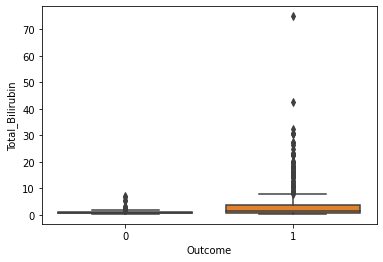

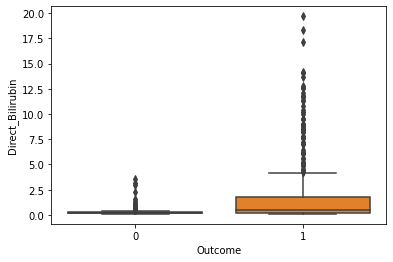

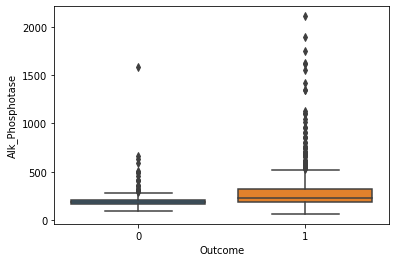

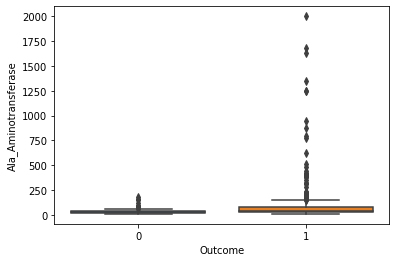

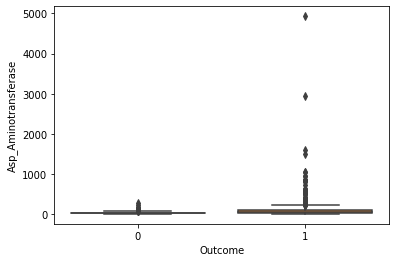

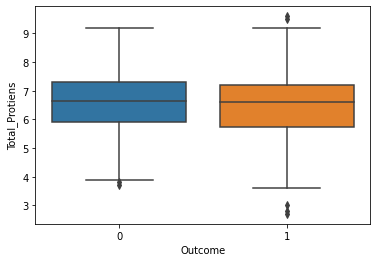

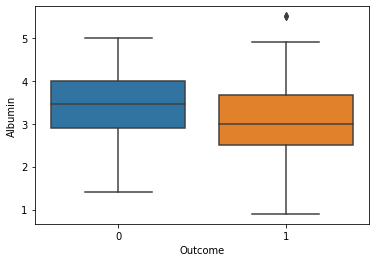

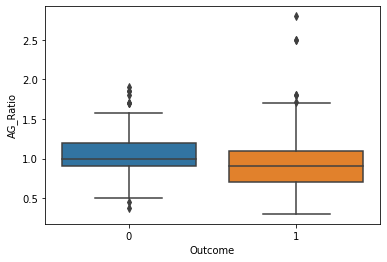

In [20]:
# Plotting box plot for all independent variables with an outlay of target
for col in input_data.select_dtypes(include=['int64', 'float32', 'float64']).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=input_data[col], x=target_data, data=input_data)
    plt.show()

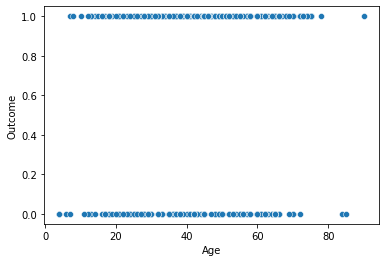

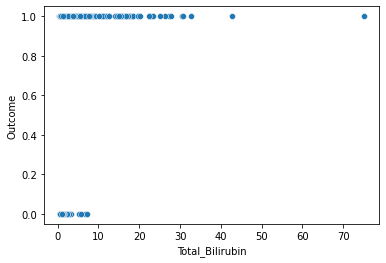

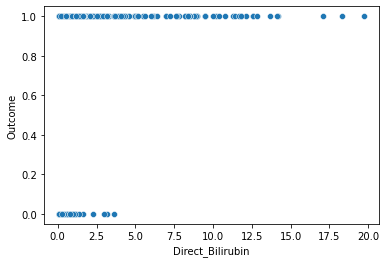

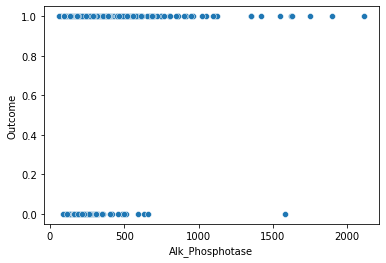

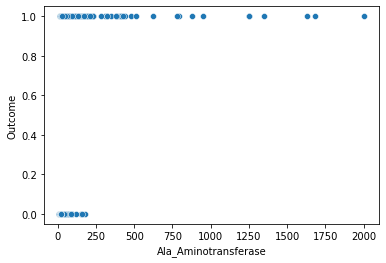

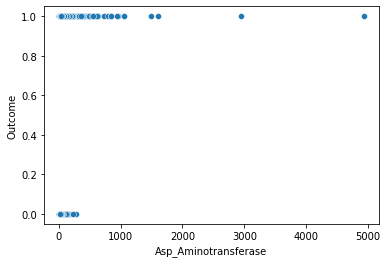

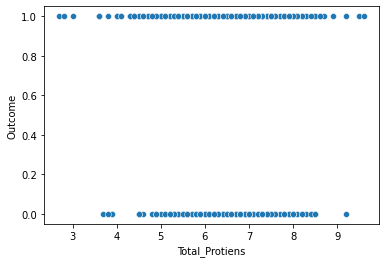

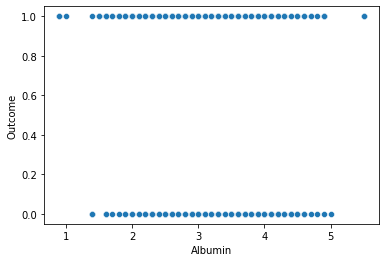

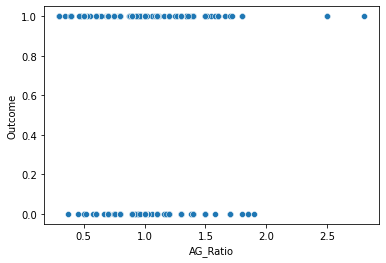

In [21]:
# Plotting scatter plots for all independent variables with target variable
for col in input_data.columns:
    sns.scatterplot(x=input_data[col], y=target_data)
    plt.show()

From the above graphs, below observations can be made -
1) Age & Albumin columns are normally distributed in the dataset.<br/>
2) Total_Bilirubin, Direct_Bilirubin, Alk_Phosphotase, Ala_Aminotransferase, Asp_Aminotransferase columns show rightly skewed distribution.<br/>
3) Total_Bilirubin, Direct_Bilirubin, Alk_Phosphotase, Ala_Aminotransferase, Asp_Aminotransferase columns have a large number of outliers on the right side.<br/>
4) Age & Albumin columns don't have any outliers.<br/>
5) People not diagnosed with liver disease have very low values of Total_Bilirubin, Direct_Bilirubin, Ala_Aminotransferase & Asp_Aminotransferase. <br/>

In [22]:
# Extracting min & max age
min_age = data['Age'].min()
max_age = data['Age'].max()

print('Minimum Age is ', min_age)
print('Maximum Age is ', max_age)

Minimum Age is  4
Maximum Age is  90


In [23]:
# Divide age in to 4 bins
age_binned = pd.cut(data['Age'], bins=4)
age_binned.value_counts()

(25.5, 47.0]     243
(47.0, 68.5]     216
(3.914, 25.5]     69
(68.5, 90.0]      42
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

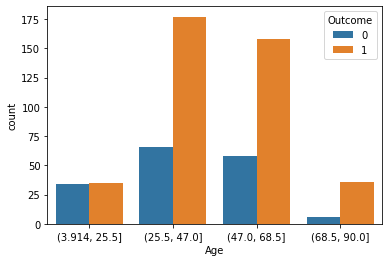

In [24]:
sns.countplot(x=age_binned, hue=data['Outcome'])

Observations -<br/>
1. Data is equally distributed among person diagnosed or not diagnosed with liver disease for age group - 3.9 to 25.5.<br/>
2. More data exists for age groups from 25.5 to 47 & from 47 to 68.5.<br/>

In [25]:
# Extracting target variable & input variables
col_length = len(data.columns)
X = data.iloc[:,0:col_length - 1]  #independent columns
y = data.iloc[:,-1]    #target column i.e Outcome

### Building Guassian Naive Bayes classifier 

In [26]:
# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)

In [27]:
# Creating Gaussian Model & fit training data
GaussianModel = GaussianNB()
GaussianModel.fit(X_train, y_train)

# Predicting outcome for test data
y_pred = GaussianModel.predict(X_test)

In [28]:
# Computing confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[47  2]
 [72 50]]


In [29]:
# Printing confusion matrix using cross tab
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,47,2,49
1,72,50,122
All,119,52,171


In [30]:
# Compute accuracy
print ("Accuracy (Gaussian NB): ", accuracy_score(y_test, y_pred)*100, "\n")

Accuracy (Gaussian NB):  56.72514619883041 



In [31]:
# Printing classification report on test data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.96      0.56        49
           1       0.96      0.41      0.57       122

    accuracy                           0.57       171
   macro avg       0.68      0.68      0.57       171
weighted avg       0.80      0.57      0.57       171



Generate precision, recall values manually -

In [32]:
# Extracting TP, TN, FP & FN values (considering person having liver disease as positive scenario)
true_positive = conf_matrix[1][1]
true_negative = conf_matrix[0][0]
false_negative = conf_matrix[0][1]
false_positive = conf_matrix[1][0]

print('True Positives:', true_positive)
print('True Negatives:', true_negative)
print('False Positives:', false_positive)
print('False Negatives:', false_negative)

sensitivity = true_positive / (false_negative + true_positive)
specificity = true_negative / (true_negative + false_positive)
precision = true_positive / (true_positive + false_positive)
f1_Score = 2 * (precision * sensitivity) / (precision + sensitivity)

print('f1 score:', f1_Score)

True Positives: 50
True Negatives: 47
False Positives: 72
False Negatives: 2
f1 score: 0.574712643678161


<b>F1 score (using Guassian NB) is 0.574 </b>

In [33]:
# Calculating FPR, TPR & threshold values
y_pred_proba = GaussianModel.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

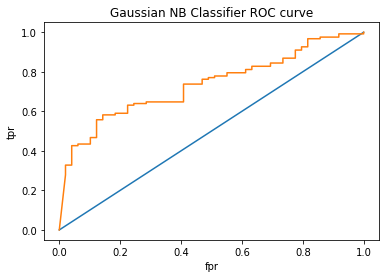

In [34]:
# Plotting FPR vs TPR
plt.plot([0,1],[0,1])
plt.plot(fpr, tpr, label='NB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Gaussian NB Classifier ROC curve')
plt.show()

In [35]:
roc_auc_score(y_test, y_pred_proba)

0.7346938775510203

<b>Area under curve using Gaussian Naive Bayes classifier is .734</b>

### Building Logistic Regression classifier

In [36]:
# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)

In [37]:
# Scaling features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
# Fit Logistic Regression to the training set
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# predict the Test set results
y_pred_lr = lr_model.predict(X_test)

In [40]:
# Printing confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(conf_matrix_lr)

[[ 12  37]
 [  8 114]]


In [41]:
# Printing confusion matrix using cross tab
pd.crosstab(y_test, y_pred_lr, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,12,37,49
1,8,114,122
All,20,151,171


In [42]:
# Compute accuracy
print ("Accuracy (Logistic Regression) : ", accuracy_score(y_test, y_pred_lr)*100, "\n")

Accuracy (Logistic Regression) :  73.68421052631578 



<b>Accuracy (using Logistic Regression) is 73.68 </b>

In [43]:
# Printing classification report on test data
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.60      0.24      0.35        49
           1       0.75      0.93      0.84       122

    accuracy                           0.74       171
   macro avg       0.68      0.59      0.59       171
weighted avg       0.71      0.74      0.70       171



Generate precision, recall values manually -

In [44]:
# Extracting TP, TN, FP & FN values (considering person having liver disease as positive scenario)
true_positive = conf_matrix_lr[1][1]
true_negative = conf_matrix_lr[0][0]
false_negative = conf_matrix_lr[0][1]
false_positive = conf_matrix_lr[1][0]

print('True Positives:', true_positive)
print('True Negatives:', true_negative)
print('False Positives:', false_positive)
print('False Negatives:', false_negative)

sensitivity = true_positive / (false_negative + true_positive)
specificity = true_negative / (true_negative + false_positive)
precision = true_positive / (true_positive + false_positive)
f1_Score_lr = 2 * (precision * sensitivity) / (precision + sensitivity)

print('f1 score:', f1_Score_lr)

True Positives: 114
True Negatives: 12
False Positives: 8
False Negatives: 37
f1 score: 0.8351648351648352


<b>F1 score (using Guassian NB) is 0.835 </b>

In [45]:
# Calculating FPR, TPR & threshold values
y_pred_proba_lr = lr_model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)

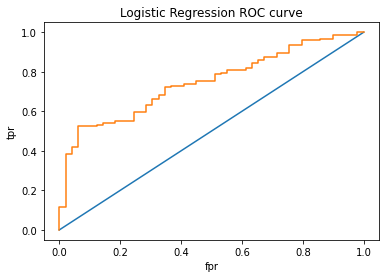

In [46]:
# Plotting FPR vs TPR
plt.plot([0,1],[0,1])
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression ROC curve')
plt.show()

In [47]:
roc_auc_score(y_test, y_pred_proba_lr)

0.7457343593174974

<b>Area under curve using Logistic Regression model is .745</b>

### Results comparison 

Accuracy Score -

In [48]:
print('Gaussian NB Accuracy score         - ', accuracy_score(y_test, y_pred)*100)
print('Logistic Regression Accuracy score - ', accuracy_score(y_test, y_pred_lr)*100)

Gaussian NB Accuracy score         -  56.72514619883041
Logistic Regression Accuracy score -  73.68421052631578


F-1 Score -

In [49]:
print('Gaussian NB F1 score         - ', f1_Score)
print('Logistic Regression F1 score - ', f1_Score_lr)

Gaussian NB F1 score         -  0.574712643678161
Logistic Regression F1 score -  0.8351648351648352


After comparing f1 score for both models (Gaussian NB = 0.574 & Logistic Regression = 0.835) on the same input dataset - logistic regression model has higher accuracy in predicting whether a person has liver disease or not based on the values provided for input features like Total_Bilirubin, Albumin etc.

<b>Out of 171 records present in test dataset, logistic regression model has predicted 126 records correctly, whereas Gaussian NB classifier has only predicted 97 records correctly.</b>

The F-1 score is better for Logistic Regression because it takes in to account the correlation between features as well, which Gaussian Naive Bayes ignores as its based on the assumption that all features are independet.

--- END -----